
# Capstone project 1: House prices advanced regression

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from ipywidgets import interact, widgets
import matplotlib.cm as cm
import matplotlib.colors as colors

import numpy as np
import pandas as pd

import pickle
import json

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [61]:
# LOAD clean data before applying LabelEncoder
df = pd.read_csv('./data/df_clean.csv',index_col =0).sort_values(by='SoldTime')
pd.to_datetime(df.SoldTime)
df.set_index('SoldTime',inplace=True)
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SoldTime,,,,,,,,,,,,,,,,,,,,,
2006-01-01,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,265,0,0,0,0,648,0,1,2006,181000
2006-01-01,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,0,319,0,0,0,0,0,1,2006,136500
2006-01-01,RL,Pave,0,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,...,192,267,0,0,0,0,0,1,2006,423000
2006-01-01,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,...,468,81,0,0,0,0,0,1,2006,205000
2006-01-01,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,160,24,0,0,0,0,0,1,2006,260000


In [58]:
%matplotlib inline
sns.set()

In [69]:
df.index.min(),df.index.max()

('2006-01-01', '2010-07-01')

In [34]:
df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    

## Time Series View

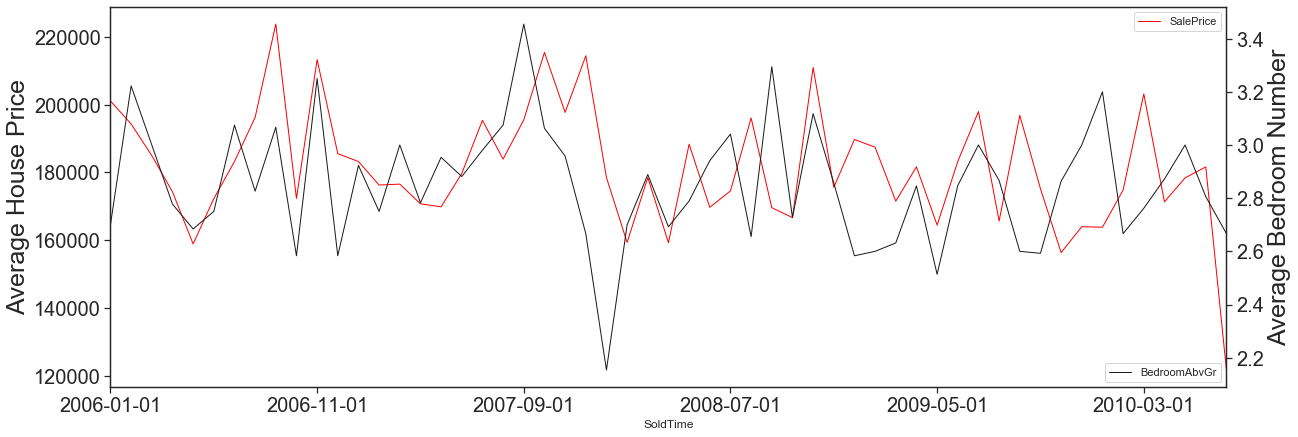

In [180]:
# Time series plot of SalePrice and Bedroom number
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df[['SalePrice']].groupby(df.index).mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax1,color='red')
df[['BedroomAbvGr']].groupby(df.index).mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax2,color='k')
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
ax1.set_ylabel('Average House Price',fontsize=25)
ax2.set_ylabel('Average Bedroom Number',fontsize=25)
plt.xlabel('Time',fontsize=25)
plt.xticks(rotation=45)
plt.show()

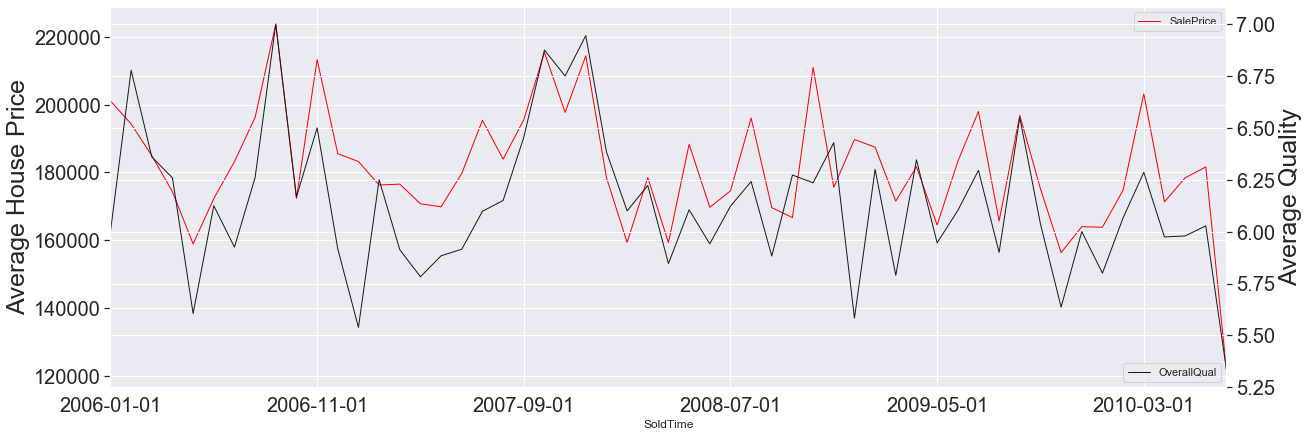

In [81]:
# Time series plot of SalePrice and overall quality
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df[['SalePrice']].groupby(df.index).mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax1,color='red')
df[['OverallQual']].groupby(df.index).mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax2,color='k')
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
ax1.set_ylabel('Average House Price',fontsize=25)
ax2.set_ylabel('Average Quality',fontsize=25)
plt.xlabel('Time',fontsize=25)
plt.xticks(rotation=45)
plt.show()

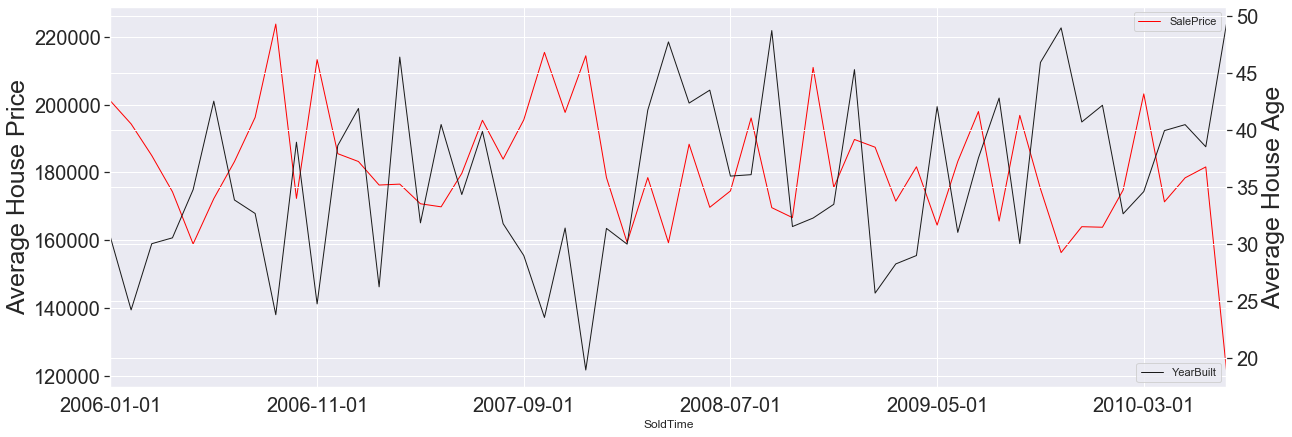

In [82]:
# Time series plot of SalePrice and house age
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df[['SalePrice']].groupby(df.index).mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax1,color='red')
df[['YearBuilt']].groupby(df.index).mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax2,color='k')
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
ax1.set_ylabel('Average House Price',fontsize=25)
ax2.set_ylabel('Average House Age',fontsize=25)
plt.xlabel('Time',fontsize=25)
plt.xticks(rotation=45)
plt.show()

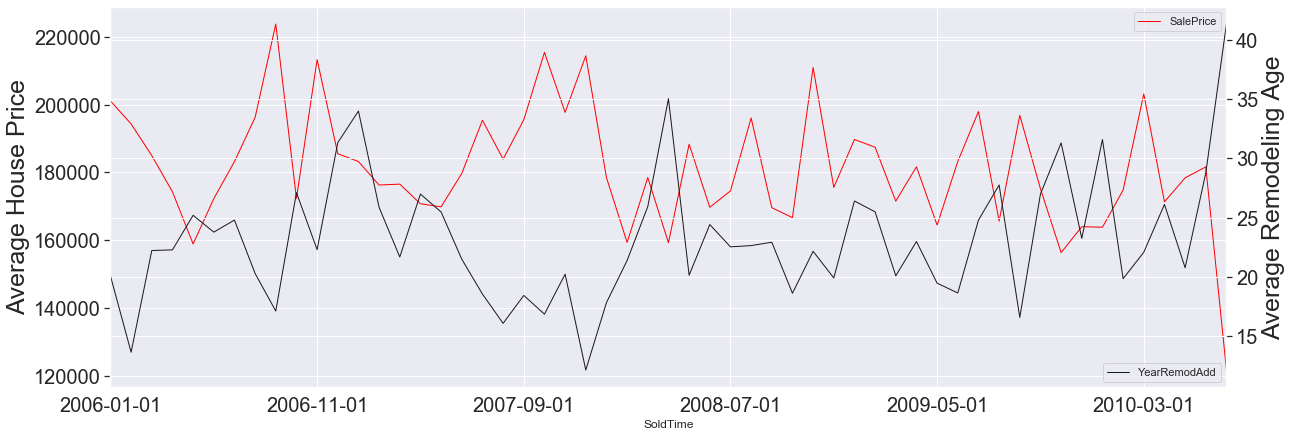

In [83]:
# Time series plot of SalePrice and house age
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df[['SalePrice']].groupby(df.index).mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax1,color='red')
df[['YearRemodAdd']].groupby(df.index).mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax2,color='k')
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
ax1.set_ylabel('Average House Price',fontsize=25)
ax2.set_ylabel('Average Remodeling Age',fontsize=25)
plt.xlabel('Time',fontsize=25)
plt.xticks(rotation=45)
plt.show()


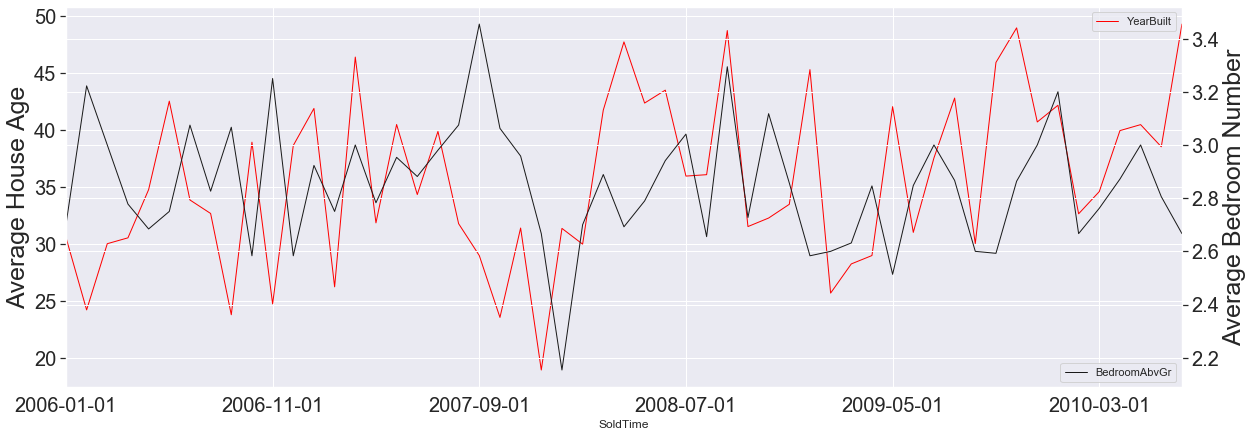

In [86]:
# Time series plot of SalePrice and house age
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df[['YearBuilt']].groupby(df.index).mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax1,color='red')
df[['BedroomAbvGr']].groupby(df.index).mean().plot(figsize=(20,7),linewidth=1,fontsize=20,ax=ax2,color='k')
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
ax1.set_ylabel('Average House Age',fontsize=25)
ax2.set_ylabel('Average Bedroom Number',fontsize=25)
plt.xlabel('Time',fontsize=25)
plt.xticks(rotation=45)
plt.show()

## Case study: bedroom number effect

In [90]:
# Step-1: Plot the ralationship of SalePrice with Living Area with BedRoom information

def plot_bedroom(df):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    colors = dict(zip(df.BedroomAbvGr.unique(),np.array(['C'+str(s) for s in range(len(df.BedroomAbvGr.unique()))])))
    plt.scatter(df.GrLivArea, df.SalePrice,
                s=df.BedroomAbvGr*20,
                c=df.BedroomAbvGr.replace(colors),alpha=0.5)

    for i in range(len(df.BedroomAbvGr.unique())):
        plt.scatter(0,0,
                    c = colors[df.BedroomAbvGr.unique()[i]], alpha=0.5,
                    label=df.BedroomAbvGr.unique()[i])
    ax.set_xlim(left=100)
    ax.set_ylim(df.SalePrice.min()-3,df.SalePrice.max()+3)
    plt.legend(title='Bedroom No.')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice ')
    plt.show()

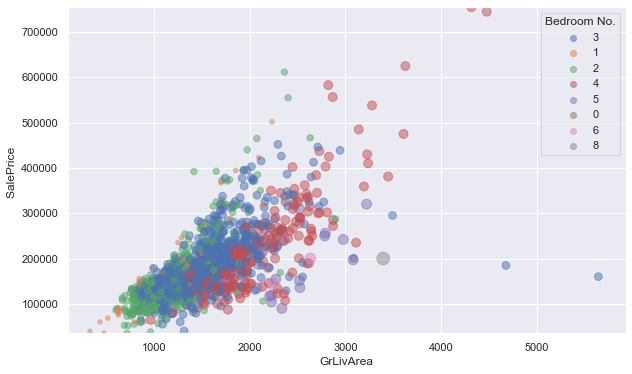

In [91]:
# Step-1: Plot the ralationship of SalePrice with Living Area with BedRoom information
plot_bedroom(df)

In [171]:
def plot_mean_sd_BR(df):
    mean = df.groupby('BedroomAbvGr').SalePrice.mean()
    sd = df.groupby('BedroomAbvGr').SalePrice.std()
    ax = mean.plot(kind='bar', fill=True, color = 'lightblue', linewidth = 1, yerr=sd, capsize=6)
    plt.ylabel('Sale Price')
    ax.set_facecolor("white")

    ax.tick_params(direction='out', length=8, width=2, colors='k')
    ax.spines['right'].set_color('white')
    ax.spines['top'].set_color('white')
    plt.ylim([0,350000])
    

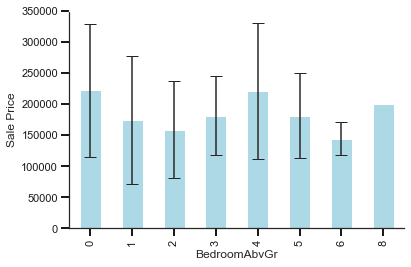

In [172]:
plot_mean_sd_BR(df)

(675, 80)

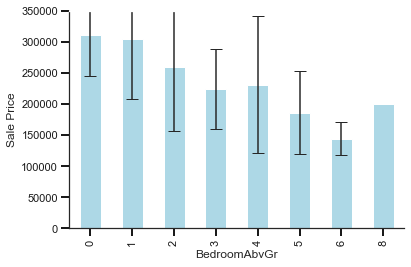

In [173]:
df1500 = df[df.GrLivArea > 1500]
plot_mean_sd_BR(df1500)
df1500.shape

(782, 80)

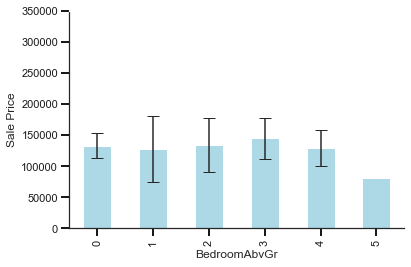

In [175]:
df0 = df[df.GrLivArea < 1500]
plot_mean_sd_BR(df0)
df0.shape

In [ ]:

# ANOVA analysis with post tukey hsd pairwise comparasion

 yh